# Assignment 2: Getting data from Twitter API

For working on this assignment, the easiest way is to log into the [datahub.berkeley.edu](http://datahub.berkeley.edu). If you have a @berkeley.edu email address, you already have full access to the programming environment hosted on that site. 

## 1. Intro

Twitter collects a *lot* of data. Ranging from tweets themselves, to data about users, to data about likes and other interactions, Twitter basically records everything that happens on their website. Lucky for data scientists like ourselves, Twitter also shares that data with us! In this assignment, we're going to use Twitter's API to analyze retweet statistics, demographics, and some other data too! 

## 2. Importing Libraries

Other people are also interested in analyzing Twitter data, so there's been work done here already. That means other folks have developed useful collections of code — called libraries — which handle a lot of parsing and data management, so that we don't have to. Since these libraries are published online, we have access to all that hard work too! That means we can use code from those libraries to handle all the complicated Twitter models, so we only have to worry about the actual analysis (which is the fun part).

You don't need to worry too much about the code in the next cell. Its purpose is to install libraries that other people have written, so that we have access to them later on.

In [20]:
!pip install tweepy    # This halps us access Twitter data.
!pip install textblob  # This helps us parse text.
!pip install plotly    # This makes it easy to plot graphs.
!pip install nltk      # This is also to parse text.

## 3. Accessing the Data

### Question 1
Follow these instructions to get your keys:
To work on Twitter data, we'll first need two things: a Twitter account, and Twitter keys. Here are the steps to follow:

1. [Create a Twitter account](https://twitter.com).  You can use an existing account if you have one.
1. [Create a Twitter developer account](https://dev.twitter.com/resources/signup).  Attach it to your Twitter account.
1. Once you're logged into your developer account, [create an application for this assignment](https://apps.twitter.com/app/new).  You can call it whatever you want, and you can write any URL when it asks for a web site.
1. On the page for that application, find your Consumer Key and Consumer Secret. Don't lose these!
1. On the same page, create an Access Token. Record the resulting Access Token and Access Token Secret. Don't lose these either!

**Security concern:** DO NOT share your access keys with anyone. They can be used to manage your Twitter account without your permission.

Add your credentials in the cell below. Your program will use them to access Twitter data.

In [21]:
consumer_key = ""
consumer_secret = ""
access_key = ""
access_secret = ""

The next cell will authorize your program to request Twitter data, through the developer account you just set up.

In [22]:
import tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_key, access_secret)
api = tweepy.API(auth)

**Note**: A lot of data scientists like Twitter data. As a result, you can only request data approximately once every 15 minutes to keep Twitter's servers from crashing due to too much activity. Use your requests wisely to avoid unnecessary waiting time.

### Question 2:
[Twitter API](https://dev.twitter.com/overview/api) can be used for retrieving different objects (e.g., tweets). List the other possible objects that can be retrieved by Twitter API.


**Answer:**
1. Users
2. Entities
3. Places

Now that everything is set up, we can use [Twitter's search API](https://dev.twitter.com/rest/reference/get/search/tweets) to find the word "Berkeley". This will give us the same results as using [Twitter's online "search" page](https://twitter.com/search?q=berkeley).

In [23]:
results = tweepy.Cursor(api.search,   # `api.search` specifies we want to perform a search.
                        q='Berkeley', # `q` is the query, or the words we're searching for.
                        result_type='popular') # We'll prioritize more popular results first.

Now `results` is a long list of search results. Since it is actually pretty extensive, let's just take the first ten results. In the next cell we build up a list called `first_ten`, which contains just the first ten tweets we found in `results`.

In [24]:
first_ten = []                  # We start out with an empty list called `first_ten`.
for tweet in results.items(10): # Then, we'll iterate over the first 10 tweets in `results`...
    first_ten.append(tweet)     # And we'll add each of those tweets to `first_ten`.

Now lets have a peek at what the data looks like. 

In [25]:
print(first_ten)

[Status(_api=<tweepy.api.API object at 0x7f465a792ba8>, _json={'created_at': 'Sat Sep 16 14:29:19 +0000 2017', 'id': 909061642318696448, 'id_str': '909061642318696448', 'text': 'There is a perfect symmetry in "Free Speech Movement" being born and then dying in the same place. #Berkeley.', 'truncated': False, 'entities': {'hashtags': [{'text': 'Berkeley', 'indices': [99, 108]}], 'symbols': [], 'user_mentions': [], 'urls': []}, 'metadata': {'result_type': 'popular', 'iso_language_code': 'en'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 78523300, 'id_str': '78523300', 'name': 'James Woods', 'screen_name': 'RealJamesWoods', 'location': '', 'description': '#America', 'url': None, 'entities': {'description': {'urls': []}}, 'protected': False, 'followers_count': 86205

## 4. Exploring the Dataset

Twitter gives us a lot of information about each tweet, not just its text. You can read about all the details [here](https://dev.twitter.com/overview/api/tweets). Let's look at one tweet to get a sense of the information we have available. We can access just the first tweet in our list by indexing into it. Note, the first index in the list is actually 0, not 1, so we will actually say `first_ten[0]` to see the first tweet in our list of ten tweets.

In [28]:
print(first_ten[5]) # Try changing this to any number 0-9, to see other tweets in the list.

Status(_api=<tweepy.api.API object at 0x7f465a792ba8>, _json={'created_at': 'Sat Sep 16 15:18:11 +0000 2017', 'id': 909073938638163971, 'id_str': '909073938638163971', 'text': 'Give those who do evil free rein. They will destroy themselves, most probably in spectacular fashion. #Berkeley… https://t.co/F5NwXpAN7P', 'truncated': True, 'entities': {'hashtags': [{'text': 'Berkeley', 'indices': [102, 111]}], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/F5NwXpAN7P', 'expanded_url': 'https://twitter.com/i/web/status/909073938638163971', 'display_url': 'twitter.com/i/web/status/9…', 'indices': [113, 136]}]}, 'metadata': {'result_type': 'popular', 'iso_language_code': 'en'}, 'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>', 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': None, 'in_reply_to_user_id_str': None, 'in_reply_to_screen_name': None, 'user': {'id': 78523300, 'id_str': '78523300',

In [27]:
print(first_ten[5].text) # Try this and inspect what it does

Give those who do evil free rein. They will destroy themselves, most probably in spectacular fashion. #Berkeley… https://t.co/F5NwXpAN7P


In [29]:
print(first_ten[5].created_at) # Try this and inspect what it does 

2017-09-16 15:18:11


In [35]:
print(first_ten[5].place) #Made this cell to test out the use of the different fucntions
print(first_ten[5].coordinates)

None
None


### Question 3:
Which field contains each of the following attributes:
1. The tweet's text?
1. The time when the tweet was posted?
1. The geographic location of the tweet?
1. The source (device and app) where the tweet was written?

**Answer:**
1. text
1. created_at
1. coordinates, place, geo(all of them)
1. source

## 5. Analyzing the Dataset

It's time to do analysis! Let's start out by getting a list, where each entry corresponds to how many retweets we got in the first 

In [36]:
retweet_counts = []                      # We start with an empty list called `retweet_counts`.
for tweet in first_ten:                  # Then, we iterate over the tweets in `first_ten`...
    retweet_count = tweet.retweet_count  # And, for each tweet, get the number of retweets...
    retweet_counts.append(retweet_count) # And append that number to our list `retweet_counts`.
    
print(retweet_counts)

[1425, 539, 282, 276, 278, 528, 172, 196, 494, 240]


Let's try and draw it:

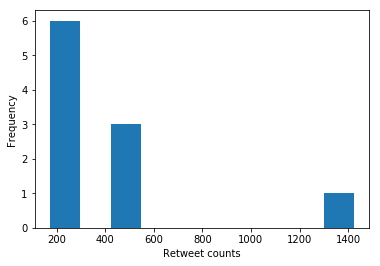

In [37]:
import matplotlib.pyplot as plt
plt.hist(retweet_counts)
plt.xlabel("Retweet counts")
plt.ylabel("Frequency")
plt.show()

### Question 4
Twitter search api provides three modes (check out this [guide](https://dev.twitter.com/rest/reference/get/search/tweets)) for the result_type: mix, recent, and popular. In the previous code, we retrieved the popular tweets. 
Now it is your turn to retrieve recent 100 tweets and assign them to a new variable (e.g., results_recent100), then plot a histogram for the retweet count of the recent 100 tweets. You can follow our example code if you wish. 


**Answer**


[0, 18894, 0, 738, 0, 1, 0, 1, 1, 16, 0, 0, 0, 0, 0, 0, 98, 104813, 2, 0, 424, 0, 18894, 0, 0, 0, 0, 17, 0, 109, 70, 0, 5149, 18894, 170, 1, 18894, 0, 1, 430, 93, 2032, 173, 8664, 5, 17, 0, 178, 843, 424, 8664, 152, 926, 0, 8664, 0, 0, 7865, 424, 738, 16, 0, 0, 256, 0, 0, 256, 25, 0, 0, 14, 3, 0, 104813, 5, 18894, 25, 1280, 616, 18894, 436, 512, 0, 738, 0, 152, 1, 925, 143, 738, 2634, 104813, 4000, 0, 25, 21, 7865, 1188, 7, 0]


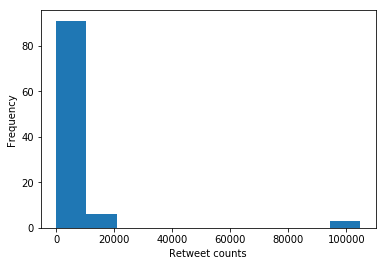

In [42]:
recent_results = tweepy.Cursor(api.search,  
                        q='Berkeley', 
                        result_type='recent')

first_hundred_recent = []                  
for tweet in recent_results.items(100): 
    first_hundred_recent.append(tweet) 

recent_retweet_counts = []                      
for tweet in first_hundred_recent:                 
    retweet_count1 = tweet.retweet_count  
    recent_retweet_counts.append(retweet_count1) 
    
print(recent_retweet_counts)

plt.hist(recent_retweet_counts)
plt.xlabel("Retweet counts")
plt.ylabel("Frequency")
plt.show()
    


### Question 5
Compare and contrast between the two histograms for retweet counts of recent and popular 100 tweets that returns from searching the word Berkeley. 

**Answer**: 


[167, 189, 253, 94, 211, 8665, 18899, 40, 4872, 6486, 2633, 3214, 155, 1930, 5149, 3726, 1081, 700, 1226, 279, 456, 202, 202, 385, 130, 131, 124, 78, 131, 121]


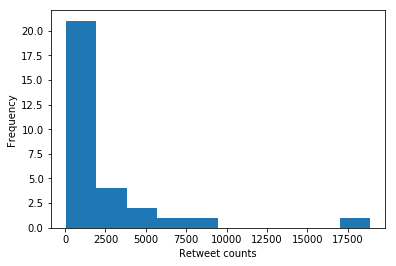

In [44]:
first_hundred_popular = []                  
for tweet in results.items(100): 
    first_hundred_popular.append(tweet) 

popular_retweet_counts = []                      
for tweet in first_hundred_popular:                 
    retweet_count1 = tweet.retweet_count  
    popular_retweet_counts.append(retweet_count1) 
    
print(popular_retweet_counts)

plt.hist(popular_retweet_counts)
plt.xlabel("Retweet counts")
plt.ylabel("Frequency")
plt.show()
    

Answer:
From the two data set visuals we can make a few very important observations:
1. The recent data set contains data arranged by time stamps. It includes entries with 0 retweets.
1. The popular data set doesn't contain any entries with 0 retweet value, however, doesn't contain the largest values of retweets either.(>10000 retweets found in recent value dataset)

Observing the data, I feel that the recent tweets shows the most recent tweets, ordered by timestamps. The interesting observation in the tweets ordered by popular, however, isn't ranked by the absolute value of the retweets. It seems like there is a more complex logic for the same. My theory for the same is that the order by popularity actually orders tweets by a looking that the rate of increase of retweets. This theory would hold true for anamolies in the data set(tweets with a large number of retweets fail to make it to the popular list as their 'rate of increase of retweets' decreases even if the absolute number of increase to retweets is constant)


## Users
Instead of searching for tweets, you can use Twitter APIs to get details about specific user account. It includes user’s timeline, followers, etc.

Get the latest 10 tweets from an account that interests you (e.g.,  UCBerkeley) twitter account using the following code.

In [48]:
user_results = api.user_timeline(screen_name='UCBerkeley', count=10)

user_results_tweets = []           # We start with an empty list called user_results_tweets

for t in user_results:             #Then, we iterate over the tweets in user_results
    user_results_tweets.append(t)  #And we'll add each of those tweets to user_results_tweets 

In [49]:
#Let's look at one tweet
print(user_results_tweets[0])

Status(_api=<tweepy.api.API object at 0x7f465a792ba8>, _json={'created_at': 'Mon Sep 18 03:04:02 +0000 2017', 'id': 909613958063120384, 'id_str': '909613958063120384', 'text': 'Visionary Award honors three Berkeley intellects shaping the future https://t.co/x0Aicm9JWA https://t.co/01nsPj4WvG', 'truncated': False, 'entities': {'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [{'url': 'https://t.co/x0Aicm9JWA', 'expanded_url': 'http://bit.ly/2w6f20e', 'display_url': 'bit.ly/2w6f20e', 'indices': [68, 91]}], 'media': [{'id': 909613955760324609, 'id_str': '909613955760324609', 'indices': [92, 115], 'media_url': 'http://pbs.twimg.com/media/DJ-ZEsvVAAEJOZ6.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DJ-ZEsvVAAEJOZ6.jpg', 'url': 'https://t.co/01nsPj4WvG', 'display_url': 'pic.twitter.com/01nsPj4WvG', 'expanded_url': 'https://twitter.com/UCBerkeley/status/909613958063120384/photo/1', 'type': 'photo', 'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 7

In [50]:
#print the text of the first 10 tweets
for tweet in user_results_tweets:
    print(tweet.created_at.strftime("%Y-%b-%d %H:%M"))
    print(tweet.text)
    print()

2017-Sep-18 03:04
Visionary Award honors three Berkeley intellects shaping the future https://t.co/x0Aicm9JWA https://t.co/01nsPj4WvG

2017-Sep-18 02:03
What I hope to achieve: A letter from Chancellor Christ https://t.co/3gVYGggXxT https://t.co/Qld1E3inqF

2017-Sep-17 22:15
ICYMI: Berkeley scholars talk #freespeech, finding common ground https://t.co/f8ubyNRjXx https://t.co/aXGwUxry7v

2017-Sep-17 19:04
Do you believe in destiny? Cal roommates have more in common than they thought https://t.co/gOo66HCVQs https://t.co/HQleNpHtlE

2017-Sep-17 18:04
Update on logistics for “#FreeSpeechWeek” https://t.co/O4OGeyXikv #freespeech https://t.co/ArYUx0gPVP

2017-Sep-17 17:03
POLL: Californians like their senators, prefer Harris stay in Congress https://t.co/eW7MIO2Ph2 @KamalaHarris https://t.co/jNjG75UmSX

2017-Sep-17 06:12
ANOTHER WIN! 🏈 3-0! #GoBears 💙🐻💛 https://t.co/0qaXGtiQw2

2017-Sep-17 03:04
ICYMI: #ShapiroAtCal event goes off with barely a hitch https://t.co/vqvNrYTcJg #freespeech https

### Question 6

Look at the text of retrieved tweets and compare them to the latest 10 tweets of the [web interface](https://twitter.com/UCBerkeley) for the same user. Do you see any difference? 

**Answer**: 
Comparing the text of retrieved tweets and the latest 10 tweets of the web interface, I noticed that while the sequence of the all tweets was exactly the same, the page began with a set of pinned tweets at the beginning in the web interface. This was the only noticeable difference between the two sets.


Get a list of a followers for UCBerkeley.

In [53]:
followers_list = []

followers_results = api.followers(screen_name='UCBerkeley', count=200, page=1)
for f in followers_results:
      followers_list.append(f)

for f in followers_list:
    print(f.name)

Kayla
Daphney not Daphne
greenbiketours
Henry Morales
Vikas Wadhwa
Nicholas Hirsch
K
Conquista Del Pan
Huaixin Wang
MsAdams
Luke Blackett
DecoAmbassador
DesignWomenSF
Christopher Finnie
nat
Deb Sue
Paramvir Singh
Rajavamsi Paruchuri
Guilherme Anderson
guibin zhang
YoDice
Arielle Dettmer
Weiting Yi
GiovanyMeza
Deven Allen
Xtronis
Abby Friedman
Trevor Goodyear
Kim Fleer
LeanBusinessGroup
William Zhang
Rick Holmes
Jean S david
mnambiar
Patricia Johns
لا قوه الا بالله
Pranav Sharma
Ali Tk.
Jacob
Roshni Rawal
sonu rajput
Lalo
SkoolMentor
Zhang
Saffron Sener
Nicole Kim
赵芃芃
Peter Samuelson
Lu
Jacob Chabot
Bachir
ASHWINI KUMAR
Zaid Ahmed Sheikh
Bruce Grenley
uStopwatch
Steve Merryman
Ice Guardian JD
Brathon
Emma Lundberg
Jesus
Simon yang
Marcelo Matos
Leslie T
Luz Maria Pineda
Rob Elmore
Sourabh Nandwana
Marcos Magalhães
Demos Wu
Phil Saggese
Nazim Naqvi
William Thorn
Therealdickrocket
Debula Kemoli
MarknY47
Owen Royal
Valmir Vilas Boas
Anthony Flowe
Felicia Murray
scott sean
Dana
Jimiao
NHUT 

There’s a limit on how many users can be returned by one request. If you need more, please read [using cursors to navigate collections](https://dev.twitter.com/overview/api/cursoring).

### Extra Credit Question 
We saw how to use Twitter API to search for tweets. The [Search API](https://dev.twitter.com/rest/public/search) has an option to filter the query results by geo location. The parameter value is specified by ”latitude,longitude,radius” (check out the documentation of API  for more information). Compare the top 10 popular tweets text that contain the word 'berkeley' from four geo locations: Berkeley, Kansas City, New York, and Barcelona Spain.


**Answer:**

**Links:**
1. [Berkeley](https://api.twitter.com/1.1/search/tweets.json?q=&geocode=37.8716,122.2727,1kmt&result_type=popular)
1. [Kansas City](https://api.twitter.com/1.1/search/tweets.json?q=&geocode=39.0997,94.5786,1kmt&result_type=popular)
1. [New York](https://api.twitter.com/1.1/search/tweets.json?q=&geocode=40.7128,74.0059,1kmt&result_type=popular)
1. [Barcelona Spain](https://api.twitter.com/1.1/search/tweets.json?q=&geocode=41.3888,2.1590,1kmt&result_type=popular)

In [76]:
search_result = tweepy.Cursor(api.search,  
                        q='berkeley', 
                        geocode=(37.8716,122.2727,1),
                        result_type='popular')
berkeley = []                  
for tweet in search_result.item(10): 
    berkeley.append(tweet) 
berkeley



AttributeError: 'Cursor' object has no attribute 'item'

### Extra Credit Question
Based on profile_location in the follower data, Compare between the followers of Donald Trump and Hillary Clinton in terms of their locations. Draw a map for both followers lists. 

**Answer:**

### Submitting the assignment

- Delete your Twitter API credentials, ie. re-assign `consumer_key`, `consumer_secret`, `access_key`, and `access_secret` to empty strings so that we won't see your credentials when you save and sumbit it.
- Save this jupyter notebook as a pdf. Click File, Download as, PDF via LaTex (.pdf).
- Upload the pdf file into bcourses under Assignment 2.